# Flair testing
Investigating long-term stellar flare rates with a flourish

In [1]:
import sys
sys.path.append('../')
import flair

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import astropy.units as u

%config InlineBackend.figure_format = 'retina'

# Setup stella and prepare the lightcurves

In [2]:
cnn, models = flair.flares.prep_stella("../data/")
lcs = flair.lightcurve.get_all_lightcurves(target='tic272272592', mission='TESS', author='SPOC')

Can only use stella.ConvNN.predict().
Models have already been downloaded to ~/.stella/models


# Run Stella

In [3]:
avg_pred = flair.flares.get_stella_predictions(cnn=cnn, models=models, lc=lcs[0])

  0%|          | 0/1 [00:00<?, ?it/s]

576/576 [==============================] - 1s 1ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

576/576 [==============================] - 1s 1ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

576/576 [==============================] - 1s 998us/step


  0%|          | 0/1 [00:00<?, ?it/s]

576/576 [==============================] - 1s 990us/step


  0%|          | 0/1 [00:00<?, ?it/s]

576/576 [==============================] - 1s 1ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

576/576 [==============================] - 1s 1ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

576/576 [==============================] - 1s 2ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

576/576 [==============================] - 1s 1ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

576/576 [==============================] - 1s 1ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

576/576 [==============================] - 1s 1ms/step


100%|██████████| 1/1 [00:01<00:00,  1.11s/it]


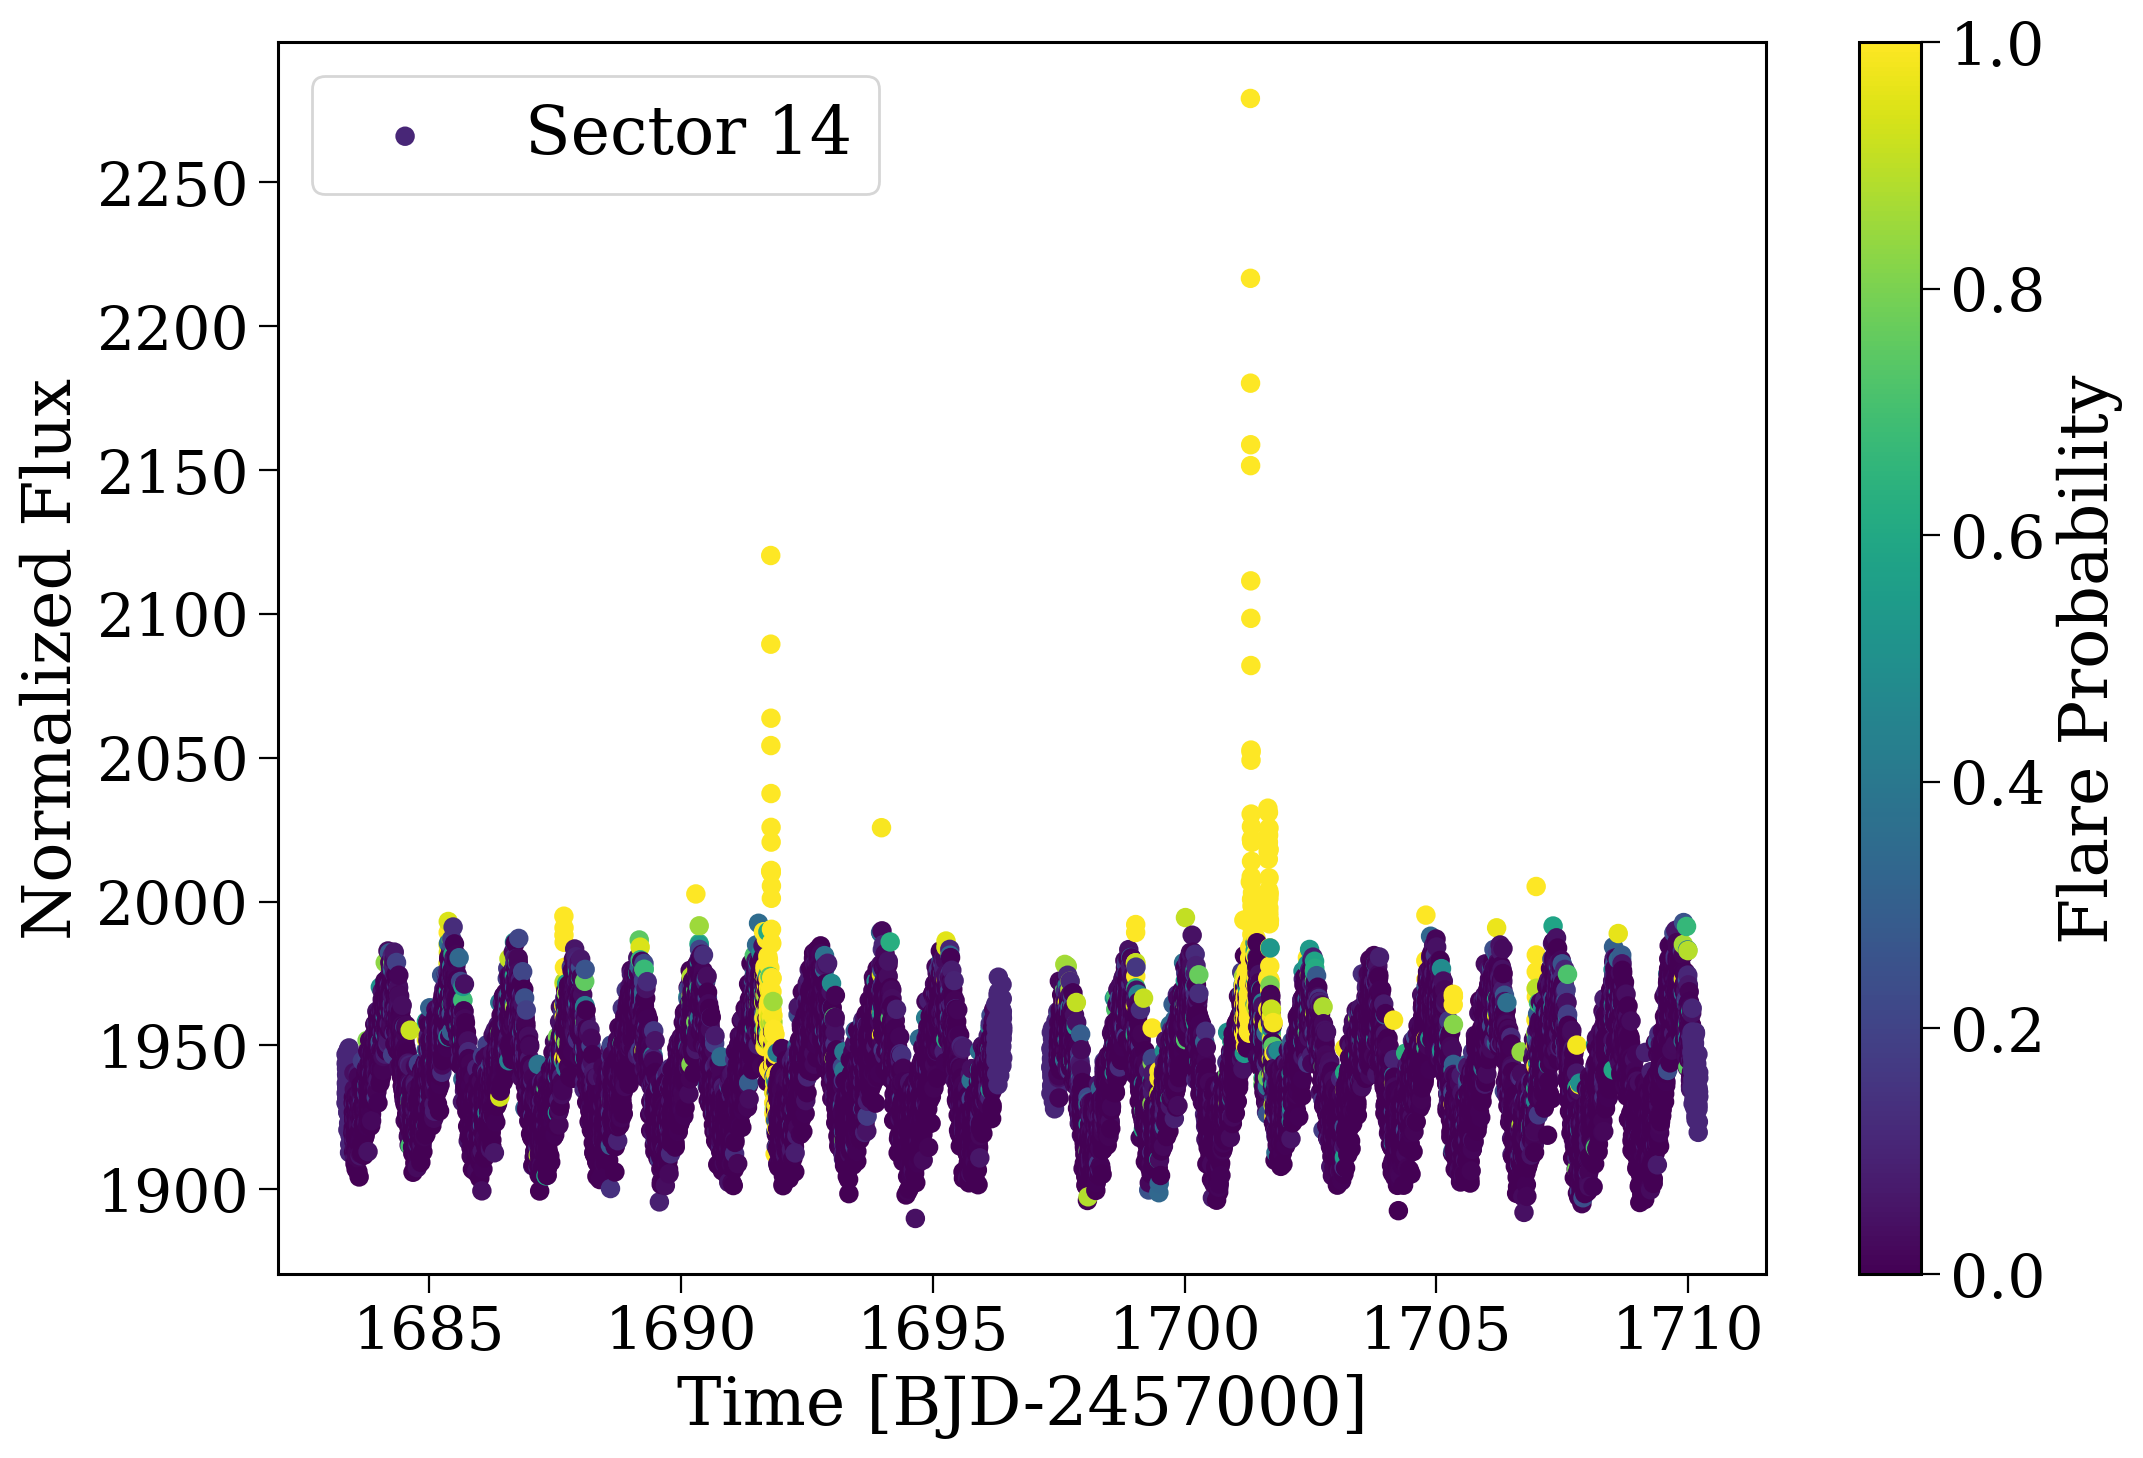

(<Figure size 1200x800 with 2 Axes>,
 <Axes: xlabel='Time [BJD-2457000]', ylabel='Normalized Flux'>)

In [4]:
flair.plot.plot_lc_with_probs(lc=lcs[0], avg_pred=avg_pred)

# Identify flares

In [5]:
flare_mask, flare_starts, flare_ends = flair.flares.get_flares(avg_pred)

# Fit GP

In [6]:
# opt_gp = flair.gp.fit_GP(lc=lcs[0], flare_mask=flare_mask)

In [7]:
# mu, variance, fig, ax = flair.plot.plot_lc_and_gp(lcs[0], flare_mask, flare_starts, flare_ends, opt_gp)

In [8]:
# ed_s = flair.flares.calc_equivalent_durations(lc=lcs[0], flare_starts=flare_starts,
#                                               flare_ends=flare_ends, gp_mean=mu).to(u.s)

In [9]:
# colours = np.zeros_like(lcs[0].time.value)
# for start, end, ed in zip(flare_starts, flare_ends, ed_s):
#     colours[start:end] = ed.value

In [10]:
# fig, ax = plt.subplots()

# ax.plot(lcs[0].time.value, lcs[0].flux.value, c='k', alpha=0.5)
# scatter = ax.scatter(lcs[0].time.value, lcs[0].flux.value, c=colours,
#                      s=50, zorder=10, norm=mpl.colors.LogNorm(), cmap="inferno")

# cbar = fig.colorbar(scatter, ax=ax, label='Equivalent Duration [s]')

# ax.set(xlabel='Time [BJD - 2457000]', ylabel='Flux [e-/s]')

# plt.show()

# Injection

In [11]:
from multiprocessing import Pool

In [12]:
lc = lcs[0]

In [13]:
[flair.inject.inject_flare(*arg) for arg in args(amps, fwhms)]

NameError: name 'args' is not defined

In [ ]:
def args(amps, fwhms):
    for amp, fwhm in zip(amps, fwhms):
        yield lc.time.value, lc.flux.value, amp, fwhm, 400

amps = [0.1, 0.2, 0.3, 0.1, 0.2]
fwhms = [0.1, 0.2, 0.3, 0.1, 0.2]
largs = [arg for arg in args(amps, fwhms)]

with Pool(5) as p:
    # results = p.starmap(flair.inject.inject_flare, args(amps, fwhms))
    results = p.starmap(flair.inject.inject_flare, largs)

print(results)

In [22]:
import astropy.units as u
each_run = 12.5 * u.s
n_repeats = 10
n_flares = 439
n_sectors = 5
n_proc = 16
runtime = each_run * n_repeats * n_flares * n_sectors / n_proc
runtime.to(u.h)

<Quantity 4.76345486 h>

In [14]:
p_recovered = flair.inject.each_flare(lc=lcs[0], flare_mask=flare_mask,
                                      flare_table_path="../data/short_test.mrt", n_repeat=1, processes=6)

/home/tom/Documents/research/flares/notebooks/../flair/lupita.py:27: RuntimeWarning: overflow encountered in exp
  * np.exp(-D2 * t+ ((B / C) + (D2 * C / 2)) ** 2) * special.erfc(((B - t) / C) + (C * D2 / 2)))
/home/tom/Documents/research/flares/notebooks/../flair/lupita.py:25: RuntimeWarning: overflow encountered in exp
  eqn = ((1 / 2) * np.sqrt(np.pi) * A * C * f1 * np.exp(-D1 * t + ((B / C) + (D1 * C / 2)) ** 2)
/home/tom/Documents/research/flares/notebooks/../flair/lupita.py:27: RuntimeWarning: overflow encountered in exp
  * np.exp(-D2 * t+ ((B / C) + (D2 * C / 2)) ** 2) * special.erfc(((B - t) / C) + (C * D2 / 2)))
/home/tom/Documents/research/flares/notebooks/../flair/lupita.py:27: RuntimeWarning: overflow encountered in exp
  * np.exp(-D2 * t+ ((B / C) + (D2 * C / 2)) ** 2) * special.erfc(((B - t) / C) + (C * D2 / 2)))
/home/tom/Documents/research/flares/notebooks/../flair/lupita.py:25: RuntimeWarning: invalid value encountered in multiply
  eqn = ((1 / 2) * np.sqrt(np.pi) * A

About to check recovery and return

/home/tom/Documents/research/flares/notebooks/../flair/lupita.py:26: RuntimeWarning: invalid value encountered in multiply
  * special.erfc(((B - t) / C) + (C * D1 / 2))) + ((1 / 2) * np.sqrt(np.pi) * A * C * f2


About to check recovery and return

/home/tom/Documents/research/flares/notebooks/../flair/lupita.py:26: RuntimeWarning: invalid value encountered in multiply
  * special.erfc(((B - t) / C) + (C * D1 / 2))) + ((1 / 2) * np.sqrt(np.pi) * A * C * f2


/home/tom/Documents/research/flares/notebooks/../flair/lupita.py:26: RuntimeWarning: invalid value encountered in multiply
  * special.erfc(((B - t) / C) + (C * D1 / 2))) + ((1 / 2) * np.sqrt(np.pi) * A * C * f2


About to check recovery and returnAbout to check recovery and returnAbout to check recovery and returnWARNING: No stella.DataSet object passed in.WARNING: No stella.DataSet object passed in.About to check recovery and return





Can only use stella.ConvNN.predict().Can only use stella.ConvNN.predict().



Models have already been downloaded to ~/.stella/modelsCan only use stella.ConvNN.predict().Models have already been downloaded to ~/.stella/models



Models have already been downloaded to ~/.stella/modelsCan only use stella.ConvNN.predict().
Models have already been downloaded to ~/.stella/models
Models have already been downloaded to ~/.stella/models
Models have already been downloaded to ~/.stella/models

Starting ith repeat


KeyboardInterrupt: 